In [21]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics

## Student's t-test

Reading:
* https://en.wikipedia.org/wiki/Student%27s_t-test

## Paired Comparison

* Difference in processor time for different implementations of the same algorithm  {1.5, 2.6, -1.8, 1.3, -0.5, 1.7, 2.4} 
* Question: can we say with  99% confidence that one is superior to the other?

In [22]:
data = [1.5, 2.6, -1.8, 1.3, -0.5, 1.7, 2.4]

In [23]:
alpha = 0.99
ci = alpha + (1-alpha)/2
df = len(data)-1
# ppf = Percent point function (inverse of cdf)
c_lb = np.mean(data) - stats.t.ppf(ci, df)*stats.sem(data) # Lower bound
c_ub = np.mean(data) + stats.t.ppf(ci, df)*stats.sem(data) # Upper bound
print(c_lb, c_ub)

-1.2188853612474566 3.2760282183903136


The confidence interval includes zero. Thus, we cannot say with 99% confidence that the mean difference is significantly different from zero.

## Unpaired Comparison From Scratch

Modified from [this link](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/#:~:text=The%20number%20of%20degrees%20of,in%20both%20samples%2C%20minus%20two.&text=The%20critical%20value%20can%20be%20calculated%20using%20the%20percent%20point,0.05%20(95%25%20confidence).)

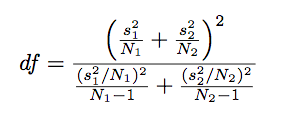

In [24]:
def degreesOfFreedom(X, Y):
  s1 = (statistics.stdev(X)**2)
  s2 = (statistics.stdev(Y)**2)
  a, b = s1/len(X), s2/len(Y)
  df = (a + b)**2 / ((a)**2 / (len(X) - 1) + (b)**2 / (len(Y) - 1))
  return(df)

In [25]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):

	# calculate means
  mean1, mean2 = np.mean(data1), np.mean(data2)

	# calculate standard errors
  se1, se2 = stats.sem(data1), stats.sem(data2)

	# standard error on the difference between the samples
  sed = math.sqrt(se1**2.0 + se2**2.0)

	# calculate the t statistic
  t_stat = (mean1 - mean2) / sed

	# degrees of freedom
	# df = len(data1) + len(data2) - 2
  df = degreesOfFreedom(data1, data2)

	# calculate the critical value
  cv = stats.t.ppf(1.0 - alpha, df)

	# calculate the p-value
  p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
	
	# return everything
  return t_stat, df, cv, p

In [26]:
# seed the random number generator
np.random.seed(1)
# generate two independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

In [27]:
degreesOfFreedom(data1, data2)

197.47588932627033

In [28]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
 
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-2.262, df=197, cv=1.653, p=0.025
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


## ttest_ind

**[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)**: This is a test for the **null hypothesis** that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

$H_0: \mu_X = \mu_Y$

Suppose we observe two independent samples, e.g. flower petal lengths, and we are considering whether the two samples were drawn from 
* the same population (e.g. the same species of flower or two species with similar petal characteristics) or 
* two different populations.

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. 
* A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. 
* If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.


In [29]:
rng = np.random.default_rng()

In [30]:
# Test with sample with identical means:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

t_statistic, p_value = stats.ttest_ind(rvs1, rvs2) # equal_var defaults to True
print('Assume equal variances:')
print("t-statistic =", t_statistic)
print("p-value =", p_value)

t_statistic, p_value = stats.ttest_ind(rvs1, rvs2, equal_var=False)
print('Assume unequal variances:')
print("t-statistic =", t_statistic)
print("p-value =", p_value)

# Large p-value --> accept the null hypothesis of equal population means

Assume equal variances:
t-statistic = -1.3447150220677715
p-value = 0.1790228071012376
Assume unequal variances:
t-statistic = -1.3447150220677715
p-value = 0.17902280988291108


In [31]:
# Test with sample with different means:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=20, scale=10, size=500, random_state=rng)

t_statistic, p_value = stats.ttest_ind(rvs1, rvs2) # equal_var defaults to True
print('Assume equal variances:')
print("t-statistic =", t_statistic)
print("p-value =", p_value)

t_statistic, p_value = stats.ttest_ind(rvs1, rvs2, equal_var=False)
print('Assume unequal variances:')
print("t-statistic =", t_statistic)
print("p-value =", p_value)

# Small p-value --> reject the null hypothesis of equal population means

Assume equal variances:
t-statistic = -22.77264617172957
p-value = 8.848746721155474e-93
Assume unequal variances:
t-statistic = -22.77264617172957
p-value = 1.001926801555775e-92


In [32]:
# ttest_ind underestimates p for unequal variances:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)

t_statistic, p_value = stats.ttest_ind(rvs1, rvs2) # equal_var defaults to True
print('Assume equal variances:')
print("t-statistic =", t_statistic)
print("p-value =", p_value)

t_statistic, p_value = stats.ttest_ind(rvs1, rvs2, equal_var=False)
print('Assume unequal variances:')
print("t-statistic =", t_statistic)
print("p-value =", p_value)


Assume equal variances:
t-statistic = -3.0474871037575335
p-value = 0.002409457717938506
Assume unequal variances:
t-statistic = -1.9832187745470142
p-value = 0.04986038506847474


**[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)**: This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.


In [33]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = (stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
        + stats.norm.rvs(scale=0.2, size=500, random_state=rng))
t_statistic, p_value = stats.ttest_rel(rvs1, rvs2)
print("t-statistic =", t_statistic)
print("p-value =", p_value)
# Large p-value --> accept the null hypothesis of equal population means

t-statistic = -1.607827340713364
p-value = 0.10850549995823225


In [34]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs3 = (stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng)
        + stats.norm.rvs(scale=0.2, size=500, random_state=rng))
t_statistic, p_value = stats.ttest_rel(rvs1, rvs3)
print("t-statistic =", t_statistic)
print("p-value =", p_value)
# Small p-value --> reject the null hypothesis of equal population means

t-statistic = -5.153587535702857
p-value = 3.6882079282605496e-07


## ttest_rel

In [35]:
!wget https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv

--2022-03-01 18:42:50--  https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2851 (2.8K) [text/plain]
Saving to: ‘blood_pressure.csv.1’

blood_pressure.csv. 100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-03-01 18:42:50 (33.9 MB/s) - ‘blood_pressure.csv.1’ saved [2851/2851]



In [36]:
!ls

blood_pressure.csv  blood_pressure.csv.1  sample_data


In [37]:
import pandas as pd
df = pd.read_csv("blood_pressure.csv")
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [38]:
# Perform the Shapiro-Wilk test for normality.
# Null hypothesis: data was drawn from a normal distribution.
stats.shapiro(df['bp_before'])
# Reject Null hypothesis. Violate the assumption of normality by a large amount.

(0.9547787308692932, 0.0004928423441015184)

In [39]:
# Perform the Shapiro-Wilk test for normality.
stats.shapiro(df['bp_after'])
# Reject Null hypothesis. Violate the assumption of normality by a large amount.

(0.9740639328956604, 0.020227791741490364)

t-test on TWO RELATED samples of scores
* https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples

In [40]:
# Calculate the t-test on TWO RELATED samples of scores
# Null hypothesis: two related or repeated samples have identical average (expected) values.
t_statistic, p_value = stats.ttest_rel(df['bp_before'], df['bp_after'])
print("t-statistic =", t_statistic)
print("p-value =", p_value)

# Reject null hypothesis of equal population means

t-statistic = 3.3371870510833657
p-value = 0.0011297914644840823
